**Hand written digit recogniser**


In [1]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from tensorflow.keras import layers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

In [2]:
pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 5.8 MB/s 
     |████████████████████████████████| 381 kB 58.0 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.30 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.


In [3]:
#livelossplot plot the loss and accuracy value in real world,
#after each epoch plot will be created
import livelossplot
plot_losses=livelossplot.PlotLossesKeras()

In [4]:
#Load the data
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
xtrain.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [5]:
xtrain=xtrain.reshape(60000,784)
xtest=xtest.reshape(10000,784)

In [6]:
xtrain.shape

(60000, 784)

In [7]:
xtrain=xtrain/xtrain.max()
xtest=xtest/xtest.max()

In [8]:
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

In [9]:
ytrain.shape

(60000, 10)

In [10]:
#Build Model

model=models.Sequential()
model.add(layers.Dense(200,activation='relu',input_dim=xtrain.shape[1]))
model.add(Dropout(0.4))
model.add(layers.Dense(200,activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(10,activation='softmax'))

In [11]:
#Compile the model

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Train Your Model**

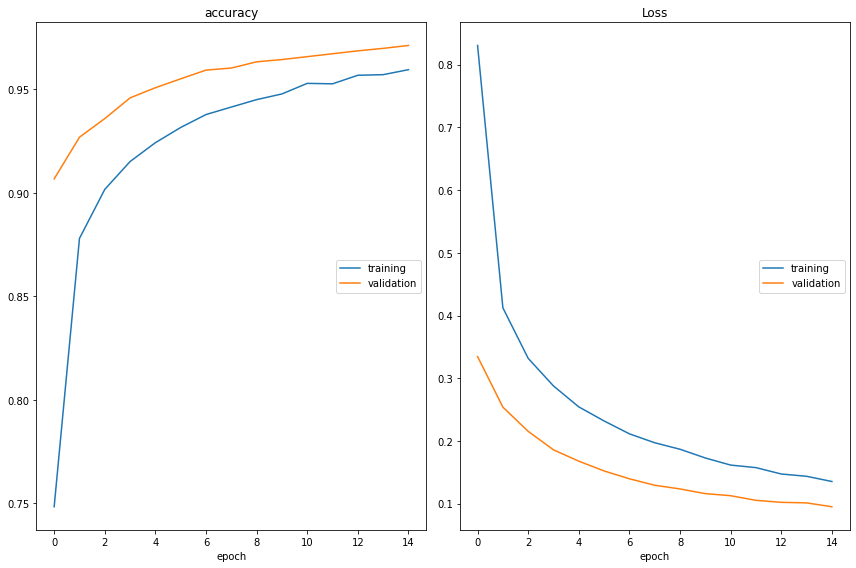

accuracy
	training         	 (min:    0.748, max:    0.959, cur:    0.959)
	validation       	 (min:    0.907, max:    0.971, cur:    0.971)
Loss
	training         	 (min:    0.135, max:    0.830, cur:    0.135)
	validation       	 (min:    0.095, max:    0.335, cur:    0.095)
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1354 - accuracy: 0.9594 - val_loss: 0.0952 - val_accuracy: 0.9711


In [12]:
model.fit(xtrain,ytrain,epochs=15,
          callbacks=(plot_losses),
          validation_data=(xtest,ytest))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               157000    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2010      
                                                                 
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


In [14]:
#prediction

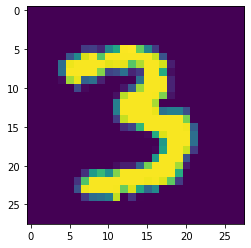

In [15]:
plt.imshow(xtest[500].reshape(28,28))

In [16]:
print(np.argmax(model.predict(xtest[500].reshape(1,784))))

3
